In [ ]:
datasetpath = "./data.xlsx"

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_excel(datasetpath)
print(f"จำนวนแถวเริ่มต้น: {len(df)}")

จำนวนแถวเริ่มต้น: 6607


In [ ]:

# traget แบ่งกลุ่มสูงต่ำ
df['Score_Group'] = np.where(df['Exam_Score'] >= 70,'คะแนนสูง', 'ตะแนนต่ำ')
y = df['Score_Group']


# รายการคอลัมน์ฟีเจอร์ 9 ตัวที่ต้องการ
feature_columns = [
    'Attendance',
    'Hours_Studied',
    'Previous_Scores',
    'Tutoring_Sessions',

    'Internet_Access',
    'Motivation_Level',
    'Family_Income',
    'Extracurricular_Activities',
    'Parental_Involvement'
]
# สร้าง X (Feature Matrix) และ y (Target Vector) ใหม่
X = df[feature_columns]

In [ ]:

#1 ลบแถวที่มีค่าว่าง (NaN) ทั้งใน X และ y
print(f"จำนวนแถวเริ่มต้น: {len(X)}")
X = X.dropna()
y = y.loc[X.index]
print(f"จำนวนแถวหลังลบค่าว่าง: {len(X)}")

# 2. การแปลงข้อมูลแบบลำดับ (Ordinal Encoding) สำหรับ 3 คอลัมน์
ordinal_cols = [
    'Parental_Involvement',
    'Family_Income',
    'Motivation_Level',
]

categories = [
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
]

encoder = OrdinalEncoder(categories=categories)
# แปลงคอลัมน์เหล่านี้เป็น String ก่อนเข้า encoder
X[ordinal_cols] = encoder.fit_transform(X[ordinal_cols].astype(str))


# 3. การแปลงข้อมูลแบบ Binary (Yes/No)
binary_cols = ['Internet_Access','Extracurricular_Activities']
X[binary_cols] = X[binary_cols].replace({'Yes': 1, 'No': 0})

# 4. การแปลงคอลัมน์ตัวเลขให้แน่ใจว่าเป็นตัวเลข
numeric_cols = ['Attendance', 'Hours_Studied','Previous_Scores','Tutoring_Sessions']
for col in numeric_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# ลบ NaN อีกครั้ง (เผื่อเกิดจากการแปลง to_numeric)
X = X.dropna()
y = y.loc[X.index]

print("\n🔥 DataFrame 'X' (9 Features) หลังการ Pre-processing สมบูรณ์:")
# ตรวจสอบขั้นสุดท้าย
if len(X.select_dtypes(include=['object']).columns) == 0:
    print("✅ ข้อมูล X ทั้งหมดถูกแปลงเป็นตัวเลขแล้ว")


จำนวนแถวเริ่มต้น: 6607
จำนวนแถวหลังลบค่าว่าง: 6607

🔥 DataFrame 'X' (9 Features) หลังการ Pre-processing สมบูรณ์:
✅ ข้อมูล X ทั้งหมดถูกแปลงเป็นตัวเลขแล้ว


/tmp/ipython-input-3873667585.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[binary_cols] = X[binary_cols].replace({'Yes': 1, 'No': 0})


### Logistic Regression

In [ ]:
# -------------------------------
# 1) Train / Test Split
# -------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X,
    y, test_size=0.2, random_state=42, stratify=y
)

print("ขนาดชุด Train:", X_train.shape)
print("ขนาดชุด Test :", X_test.shape)


# -------------------------------
# 2) Scaling (StandardScaler)
# -------------------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


# -------------------------------
# 3) Train Logistic Regression
# -------------------------------
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_scale, y_train)

print("🎉 เทรนเสร็จแล้วครับ")


ขนาดชุด Train: (5285, 9)
ขนาดชุด Test : (1322, 9)
🎉 เทรนเสร็จแล้วครับ


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------
# 4) Predict
# ------------------------------------
y_pred = logreg.predict(X_test_scale)

Confusion Matrix:
[[244  81]
 [ 37 960]]


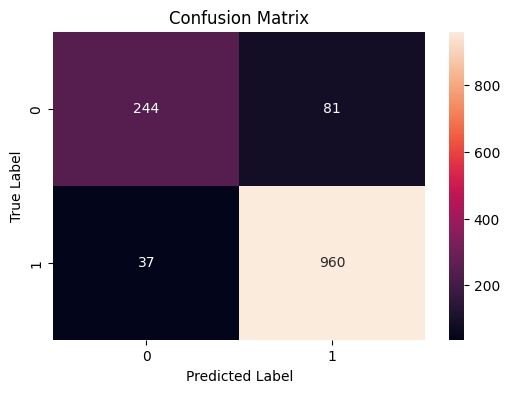

In [ ]:
# ------------------------------------
# 5) Confusion Matrix
# ------------------------------------
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:

# ------------------------------------
# 6) Classification Report
# ------------------------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    คะแนนสูง       0.87      0.75      0.81       325
    ตะแนนต่ำ       0.92      0.96      0.94       997

    accuracy                           0.91      1322
   macro avg       0.90      0.86      0.87      1322
weighted avg       0.91      0.91      0.91      1322

